In [1]:
import os
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from skgarden import RandomForestQuantileRegressor


import src.data.preprocessor as pre
import src.data.datasets as data
import src.helper as h

c:\Users\Alireza\.conda\envs\cp_rul\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\Users\Alireza\.conda\envs\cp_rul\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  meth

{'bodies': [<matplotlib.collections.PolyCollection at 0x18a69384df0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x18a69384d00>,
 'cmins': <matplotlib.collections.LineCollection at 0x18a693858a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x18a69385c90>}

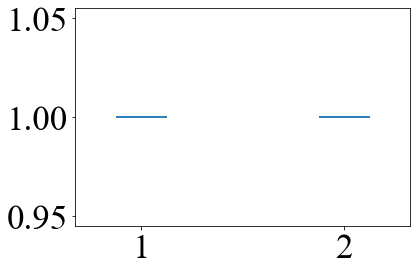

In [17]:
import matplotlib.pyplot as plt
import numpy as np

a = np.ones((5,2))

plt.violinplot(a)

In [83]:
import os
import pickle 

dataset_name = "CMAPSS3"
methods = ["SCP","nex-SCP","adaptive SCP","adaptive nex-SCP","CQR"]
portions = [0.1, 0.2, 0.3, 0.4, 0.5]
seeds = [10, 11, 12 ,13, 21, 22, 23, 24, 30, 31, 32]


cvg_data = np.zeros((len(seeds), 4*5))
len_data = np.zeros((len(seeds), 4*5))

for p in range(len(portions)):
    for s in range(len(seeds)):
        addr = os.path.join("result_cvgs", dataset_name, "cal_portion_"+str(portions[p]), "seed_"+str(seeds[s]), "left_cvg_len_dic.pkl")
        with open(addr, 'rb') as f:
            res = pickle.load(f)
        cvg_tem = []
        len_temp = []
        for alpha in [0.1, 0.15, 0.2, 0.25]:
            cvg_tem.append(res[alpha]['SCP'][1])
            len_temp.append(res[alpha]['SCP'][2])
        cvg_data[s,4*p:4*(p+1)] = np.array(cvg_tem)
        len_data[s,4*p:4*(p+1)] = np.array(len_temp)




In [153]:
import os
import pickle 

dataset_name = "CMAPSS1"
methods = ["SCP","nex-SCP","adaptive SCP","adaptive nex-SCP","CQR"]
portions = [0.1, 0.2, 0.3, 0.4, 0.5]
seeds = [10, 11, 12 ,13, 21, 22, 23, 24, 30, 31, 32]
seeds = [10, 11, 21, 22, 24, 32]

cvg_data = np.zeros((len(seeds), 4*5))
len_data = np.zeros((len(seeds), 4*5))

for m in range(len(methods)):
    for s in range(len(seeds)):
        addr = os.path.join("result_cvgs", dataset_name, "cal_portion_"+str(0.1), "seed_"+str(seeds[s]), "left_cvg_len_dic.pkl")
        with open(addr, 'rb') as f:
            res = pickle.load(f)
        cvg_tem = []
        len_temp = []
        for alpha in [0.1, 0.15, 0.2, 0.25]:
            cvg_tem.append(res[alpha][methods[m]][1])
            len_temp.append(res[alpha][methods[m]][2])
        cvg_data[s,4*m:4*(m+1)] = np.array(cvg_tem)
        len_data[s,4*m:4*(m+1)] = np.array(len_temp)


In [2]:
import numpy as np
np.arange(10,40)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

{'bodies': [<matplotlib.collections.PolyCollection at 0x18a687887c0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x18a68788820>,
 'cmins': <matplotlib.collections.LineCollection at 0x18a687d83d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x18a687db220>}

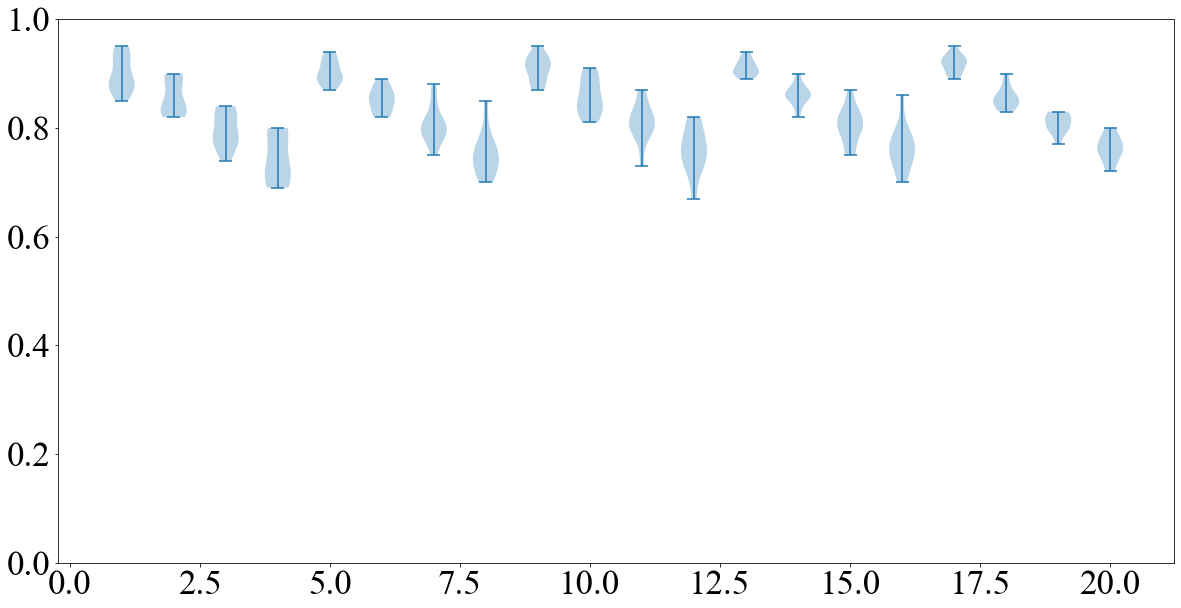

In [36]:
plt.figure(figsize=(20,10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 35
plt.ylim([0,1])
plt.violinplot(cvg_data)

(10.0, 150.0)

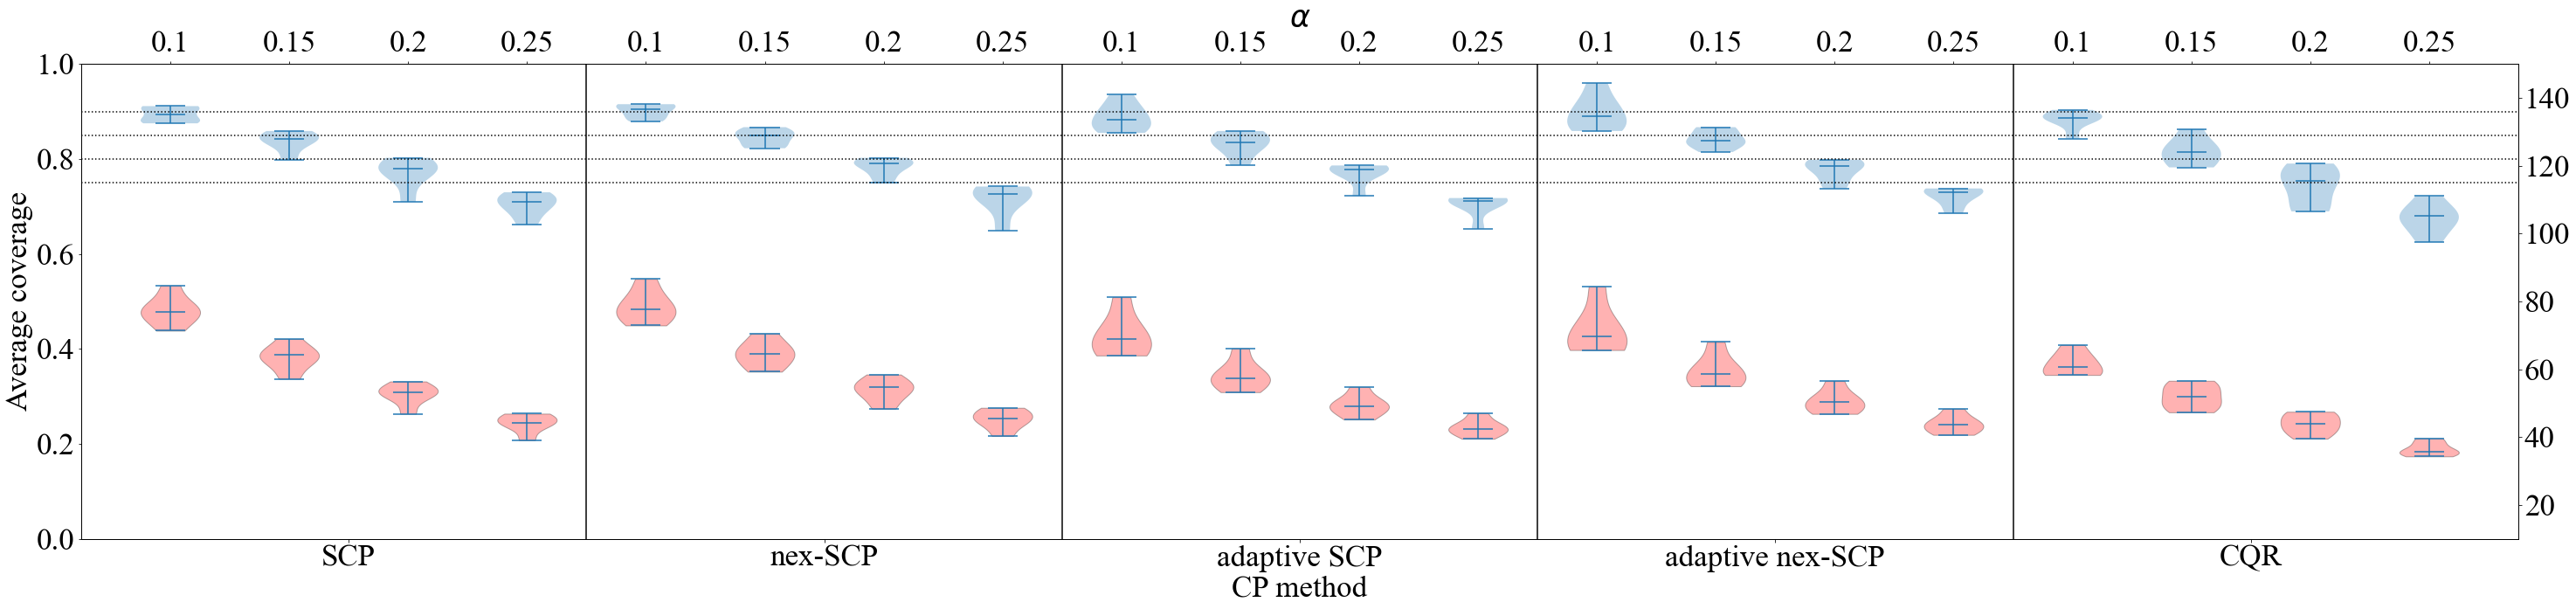

In [118]:
import matplotlib.patches as mpatches

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top') 
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel(r'$\alpha$')
    for i in range(4):
        ax.axvline(x=4*(i+1)+ 0.5, color='k')
        ax.axhline(y=0.9-0.05*(i), color='k', linestyle=":")

def set_axis_style2(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_position('bottom') 
    ax.set_xticks(np.arange(2.5, 19, 4), labels=labels)
    ax.set_xlim(0.25, 20 + 0.75)
    ax.set_xlabel("CP method")
    ax.set_ylabel('Average Length') 

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 35

fig, ax1 = plt.subplots(figsize=(50, 10))

ax1.set_xlabel('calibration portion')
ax1.set_ylabel('Average coverage')
ax1.violinplot(cvg_data, showmedians=True)
ax1.tick_params(axis='y')
set_axis_style(ax1, [0.1, 0.15, 0.2, 0.25]*5)
ax1.set_ylim([0,1])
ax2 = ax1.twinx().twiny()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Average Length')  # we already handled the x-label with ax1
violin_parts = ax2.violinplot(len_data, showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
ax2.tick_params(axis='y')
set_axis_style2(ax2, methods)
ax2.set_ylim([10,150])
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.legend()
#plt.savefig("AJ.pdf", bbox_inches='tight', pad_inches=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


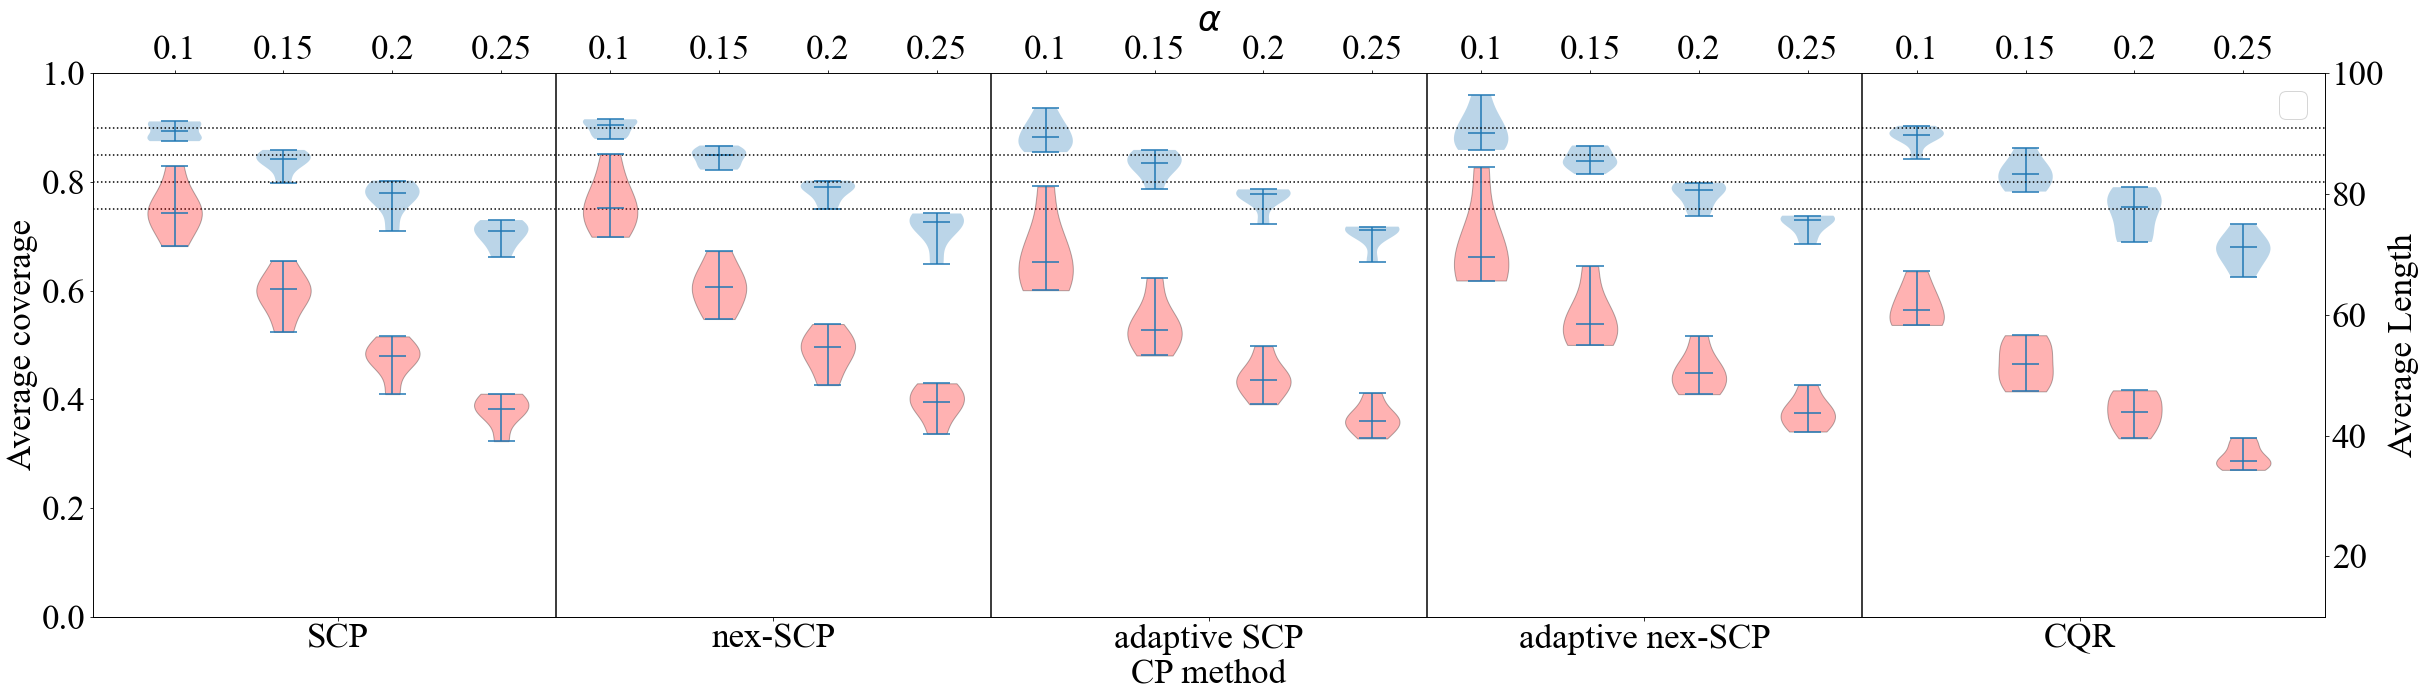

In [125]:
import matplotlib.patches as mpatches

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top') 
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel(r'$\alpha$')
    for i in range(4):
        ax.axvline(x=4*(i+1)+ 0.5, color='k')
        ax.axhline(y=0.9-0.05*(i), color='k', linestyle=":")

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 35

fig, ax1 = plt.subplots(figsize=(40, 10))

ax1.set_xlabel('calibration portion')
ax1.set_ylabel('Average coverage')
ax1.violinplot(cvg_data, showmedians=True)
ax1.tick_params(axis='y')
set_axis_style(ax1, [0.1, 0.15, 0.2, 0.25]*5)
ax1.set_ylim([0,1])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Average Length')  # we already handled the x-label with ax1
violin_parts = ax2.violinplot(len_data, showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
ax2.tick_params(axis='y')
ax2.set_ylim([10,100])

secax = ax1.secondary_xaxis('bottom')
secax.set_xticks(np.arange(2.5, 19, 4), labels=methods)
secax.set_xlabel("CP method")

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()
plt.show()

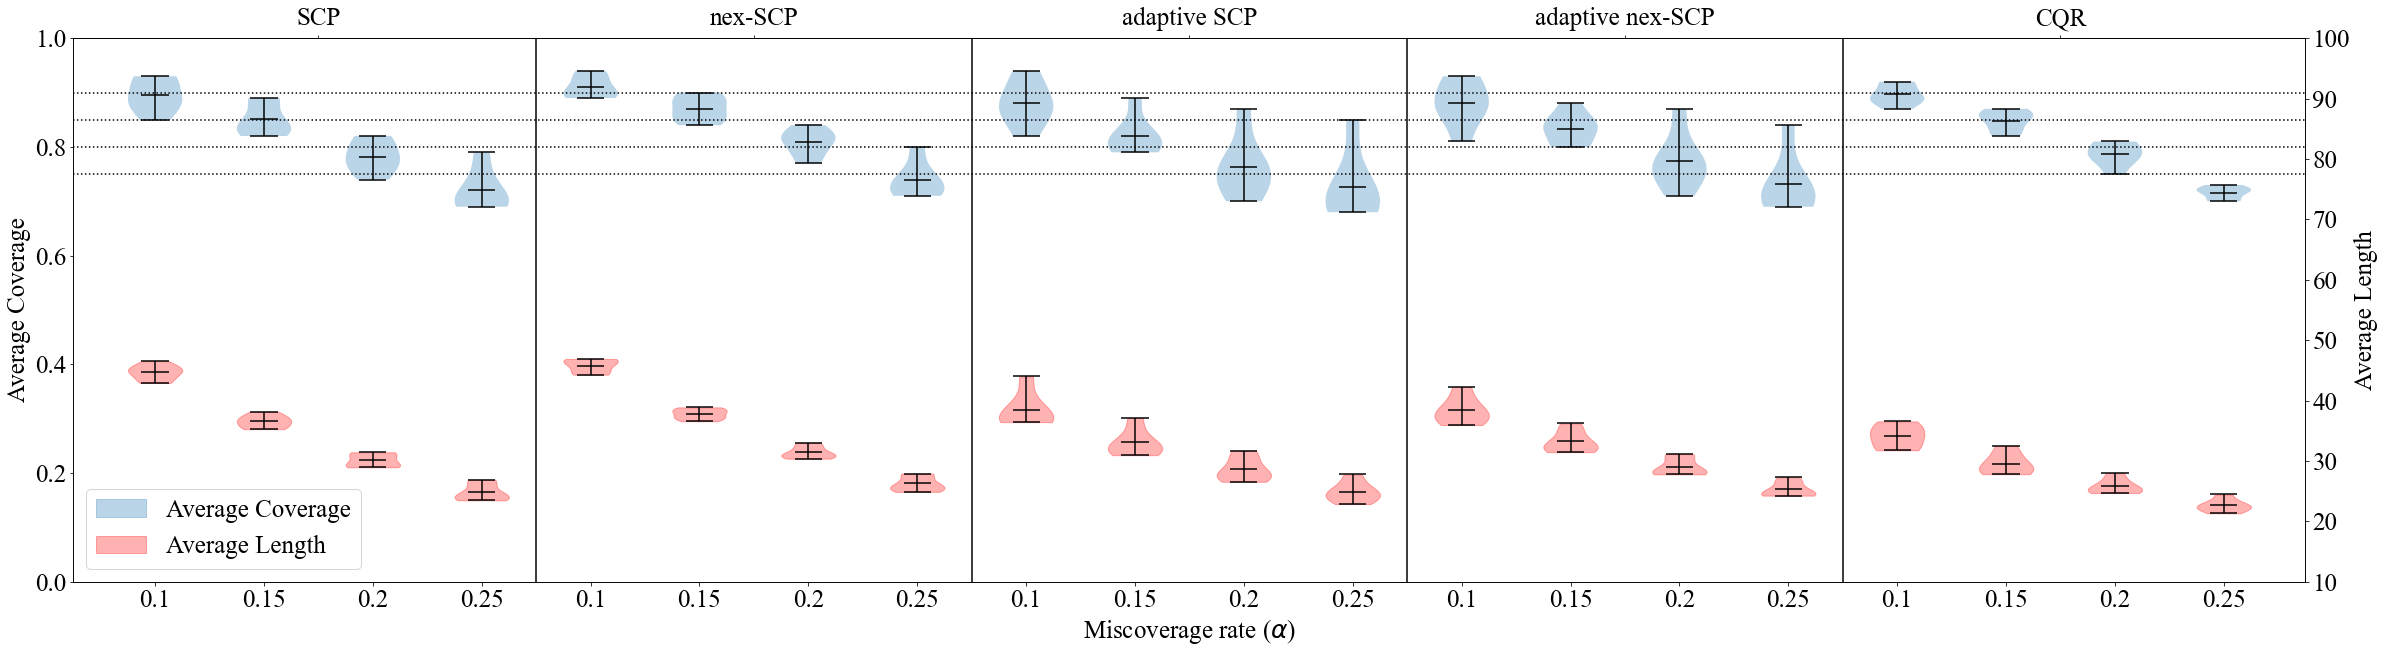

In [155]:
import matplotlib.patches as mpatches

labels = []

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 25

fig, ax1 = plt.subplots(figsize=(40, 10))

ax1.set_ylabel('Average Coverage')
violin_parts1 = ax1.violinplot(cvg_data, showmeans=True)
violin_parts1['cbars'].set_color('black')
violin_parts1['cmaxes'].set_color('black')
violin_parts1['cmins'].set_color('black')
violin_parts1['cmeans'].set_color('black')
# for pc in violin_parts1['bodies']:
#     pc.set_color('cyan')
ax1.set_xticks(np.arange(1, 21), labels=[0.1, 0.15, 0.2, 0.25]*5)
ax1.set_xlim(0.25, 20 + 0.75)
ax1.set_xlabel(r'Miscoverage rate ($\alpha$)')
for i in range(4):
    ax1.axvline(x=4*(i+1)+ 0.5, color='k')
    ax1.axhline(y=0.9-0.05*(i), color='k', linestyle=":")
ax1.set_ylim([0,1])
labels.append((mpatches.Patch(color=violin_parts1['bodies'][0].get_facecolor()), 'Average Coverage'))



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average Length')  # we already handled the x-label with ax1
violin_parts2 = ax2.violinplot(len_data, showmeans=True)
for pc in violin_parts2['bodies']:
    pc.set_color('red')
    #pc.set_facecolor('red')
    #pc.set_edgecolor('red')
ax2.set_ylim([10,100])
violin_parts2['cbars'].set_color('black')
violin_parts2['cmaxes'].set_color('black')
violin_parts2['cmins'].set_color('black')
violin_parts2['cmeans'].set_color('black')
secax = ax1.secondary_xaxis('top')
secax.set_xticks(np.arange(2.5, 19, 4), labels=methods)
#secax.set_xlabel("CP method")
labels.append((mpatches.Patch(color=violin_parts2['bodies'][0].get_facecolor()), 'Average Length'))
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend(*zip(*labels), loc="lower left")
plt.show()

In [147]:
labels

[(<matplotlib.patches.Patch at 0x18a6e3884c0>, 'Average coverage')]

In [88]:
line

{'bodies': [<matplotlib.collections.PolyCollection at 0x18a7066c640>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x18a7066c550>,
 'cmins': <matplotlib.collections.LineCollection at 0x18a706616f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x18a70661e40>}

In [23]:
a= np.ones((5,5))

In [24]:
a

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [25]:
a[0,:] = np.array([2,3,4,5,6])
a

array([[2., 3., 4., 5., 6.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [26]:
b = np.array([])

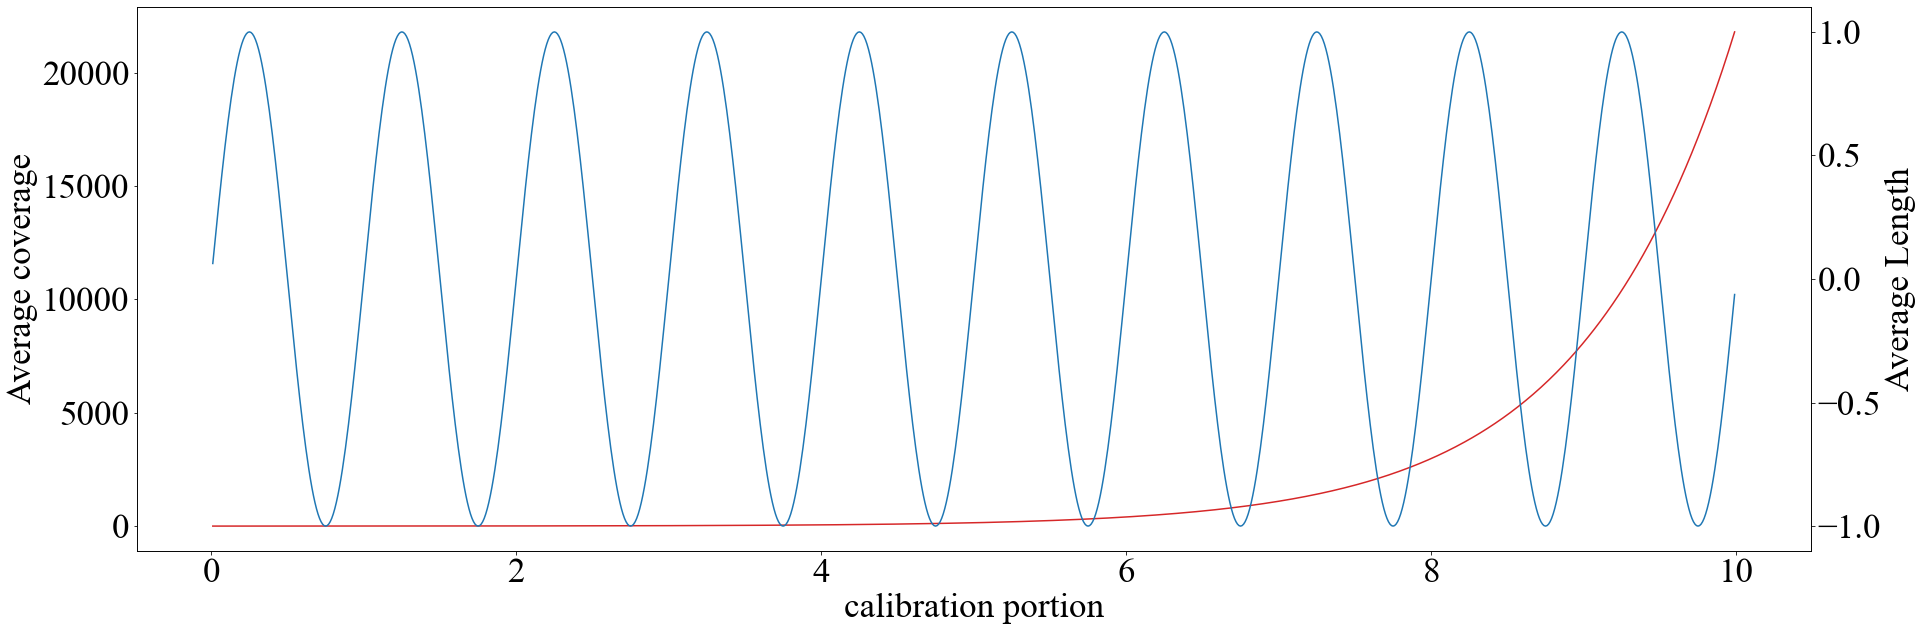

In [14]:
# Create some mock data
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 35

t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots(figsize=(30, 10))

color = 'tab:red'
ax1.set_xlabel('calibration portion')
ax1.set_ylabel('Average coverage')
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Length')  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y')

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [2]:
#CMAPSS data removable and ignorable cols
removable_cols = ["sm01", "sm05", "sm06", "sm10", "sm16", "sm18", "sm19"]
ignore_columns = ["time", "os1", "os2", "os3"]


dataset_name  = "CMAPSS1"
dataset = data.get_dataset(dataset_name, MinMaxScaler(feature_range=(-1, 1)))
split_dataset = pre.split_dataset(dataset, cal_size=0.1, random_state=0)
proc_dataset = pre.preprocess_split(split_dataset, scaler_factory=dataset["scaler_factory"], window_size=1, removable_cols=removable_cols, ignore_columns=ignore_columns)

X_train = proc_dataset["train"]["X"].reshape((-1,14))
y_train = proc_dataset["train"]["y"]
X_cal = proc_dataset["cal"]["X"].reshape((-1,14))
y_cal = proc_dataset["cal"]["y"]
idx_cal = proc_dataset["cal"]["index"]
X_test, y_test, idx_test = h.reform_test_data(proc_dataset["test"])

In [3]:
X_test = X_test.reshape((-1,14))

In [4]:
rfqr = RandomForestQuantileRegressor(
    random_state=0, min_samples_split=10, n_estimators=100)
rf = RandomForestRegressor(
    random_state=0, min_samples_split=10, n_estimators=100)

In [5]:
rf.fit(X_train, y_train)

c:\Users\Alireza\.conda\envs\cp_rul\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [6]:
rfqr.fit(X_train, y_train)

c:\Users\Alireza\.conda\envs\cp_rul\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomForestQuantileRegressor(bootstrap=True, criterion='mse', max_depth=None,
                              max_features='auto', max_leaf_nodes=None,
                              min_samples_leaf=1, min_samples_split=10,
                              min_weight_fraction_leaf=0.0, n_estimators=100,
                              n_jobs=1, oob_score=False, random_state=0,
                              verbose=0, warm_start=False)

In [7]:
scores.shape

NameError: name 'scores' is not defined

In [ ]:
alpha = 0.1
rho = 0.9

y_hat_cal = rf.predict(X_cal).reshape((-1,1))
y_hat_test = rf.predict(X_test).reshape((-1,1))
scores = np.abs(y_cal - y_hat_cal) 
q = h.compute_quantile(scores, alpha)
q_array = h.compute_quantiles_nex(rho, scores, idx_test, idx_cal, alpha)

print(h.compute_coverage_len(y_test, np.maximum(0,y_hat_test - q), y_hat_test + q))
print(h.compute_coverage_len(y_test, np.maximum(0,y_hat_test - q_array), y_hat_test + q_array))

TypeError: _quantile_dispatcher() got an unexpected keyword argument 'method'

In [ ]:
np.quantile()

In [2]:
print("hi")

hi


In [9]:
np.sqrt(mean_squared_error(y_test, RF.predict(X_test)))

17.229705975436723

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_hat_train = RF.predict(X_train)
y_hat_calval = RF.predict(X_calval)
res_train = np.abs(y_hat_train - y_train) 
res_calval = np.abs(y_hat_calval - y_calval) 


RF2 = RandomForestRegressor(random_state=0) 
RF2.fit(X_train, res_train)

print(res_train.mean())
print(mean_absolute_error(res_train, RF2.predict(X_train)))
print(mean_absolute_error(res_calval, RF2.predict(X_calval)))

MemoryError: could not allocate 1206124544 bytes

In [ ]:
alpha = 0.1
rho = 0.99
beta = 0

y_hat_cal = RF.predict(X_calval).reshape((-1,1))
y_hat_test = RF.predict(X_test).reshape((-1,1))
cal_errors = np.abs(y_calval - y_hat_cal) 

sigma_cal = RF2.predict(X_calval).reshape((-1,1))
scores = cal_errors/(sigma_cal+beta)
q = u.compute_quantile(scores, alpha)
q_array = u.compute_quantiles_nex(rho, scores, idx_test, idx_calval, alpha)
sigma_test = RF2.predict(X_test).reshape((-1,1))


print(u.compute_coverage_len(y_test, np.maximum(0,y_hat_test - q*(sigma_test + beta)), y_hat_test + q*(sigma_test + beta)))

print(u.compute_coverage_len(y_test, np.maximum(0,y_hat_test - q_array*(sigma_test + beta)), y_hat_test + q_array*(sigma_test + beta)))


In [5]:



param_grid = {'max_depth': [2, 5, 10, 15, None],
              'min_samples_split': [10, 50, 100],
              'min_samples_leaf': [1, 10, 50],
              'max_features': ["auto", "sqrt", "log2", None]}
base_estimator = RandomForestRegressor(random_state=0)      
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=30).fit(X_train, y_train)

c:\Users\Alireza\.conda\envs\rul_unc\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Alireza\.conda\envs\rul_unc\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Alireza\.conda\envs\rul_unc\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Alireza\.conda\envs\rul_unc

In [6]:
sh.best_params_

{'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 16}

In [7]:



np.sqrt(mean_squared_error(y_calval, sh.predict(X_calval)))

19.165472027960575

In [8]:
np.sqrt(mean_squared_error(y_test, sh.predict(X_test)))

20.410910350484997

In [17]:
base_estimator = RandomForestRegressor(random_state=0) 
base_estimator.fit(X_train, y_train)

C:\Users\Alireza\AppData\Local\Temp\ipykernel_22068\938845338.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_estimator.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [23]:
np.sqrt(mean_squared_error(y_calval, base_estimator.predict(X_calval)))


18.04926710098784

In [24]:
np.sqrt(mean_squared_error(y_test, base_estimator.predict(X_test)))

17.229705975436723

In [53]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(X_calval)

NearestNeighbors(n_neighbors=10)

In [54]:
distances, indices = neigh.kneighbors()

In [55]:
distances.shape

(2227, 10)

In [57]:
y_hat_calval = base_estimator.predict(X_calval).reshape((-1,1))
errors_vec = np.abs(y_calval - y_hat_calval)
errors_vec.shape

(2227, 1)

In [58]:
mu = []
for dist, idx in zip(distances, indices):
    nomi = ((errors_vec[idx]).reshape(-1)/dist).sum()
    denomi = (1/dist).sum()
    mu.append(nomi/denomi)

In [74]:
beta = 0
scores = errors_vec.reshape(-1)/(np.array(mu) + beta)
scores.shape

(2227,)

In [75]:
alpha = 0.1
q = u.compute_quantile(scores, alpha)
q

1.8347519404464303

In [61]:
y_hat_test = base_estimator.predict(X_test).reshape((-1,1))

distances_test, indices_test = neigh.kneighbors(X_test)

distances_test.shape

(100, 10)

In [62]:
mu_test = []
for dist, idx in zip(distances_test, indices_test):
    nomi = ((errors_vec[idx]).reshape(-1)/dist).sum()
    denomi = (1/dist).sum()
    mu_test.append(nomi/denomi)

In [86]:
print(u.compute_coverage_len(y_test.reshape(-1), y_hat_test.reshape(-1) - q*(np.array(mu_test)+beta), y_hat_test.reshape(-1) + q*(np.array(mu_test)+beta)))

(0.9, 0.88, 50.4537384667519)


In [79]:
y_low = y_hat_test.reshape(-1) - q*(np.array(mu_test)+beta)
y_hi = y_hat_test.reshape(-1) + q*(np.array(mu_test)+beta)

In [78]:
y_test[:10]

array([[112.],
       [ 98.],
       [ 69.],
       [ 82.],
       [ 91.],
       [ 93.],
       [ 91.],
       [ 95.],
       [111.],
       [ 96.]], dtype=float32)

In [85]:
y_test<=y_hi

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True, False, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True,  True]])

In [84]:
y_hi.shape

(100,)

KeyError: 'nex-SCP'

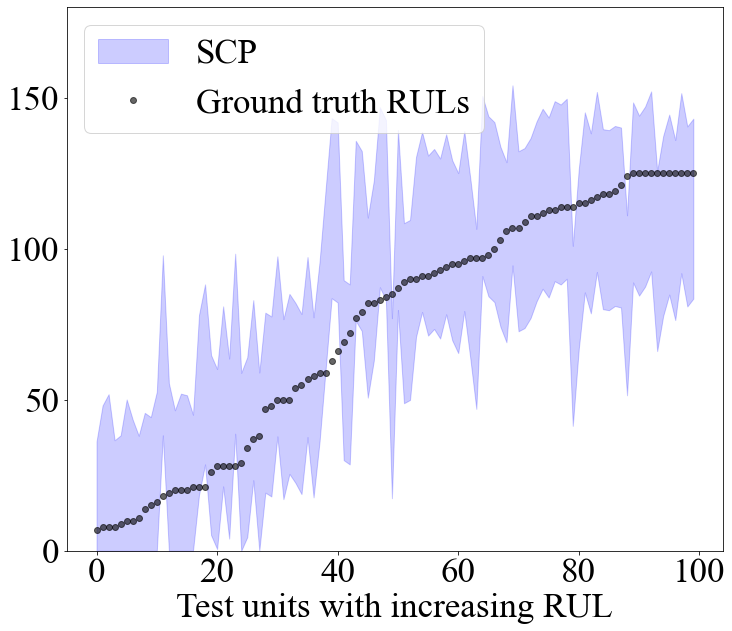

In [72]:
test_res = {"SCP": (np.maximum(0,y_hat_test - q), y_hat_test + q)}
u.plot_sorted_targets_intervals(test_res, y_test)

KeyError: 'nex-SCP'

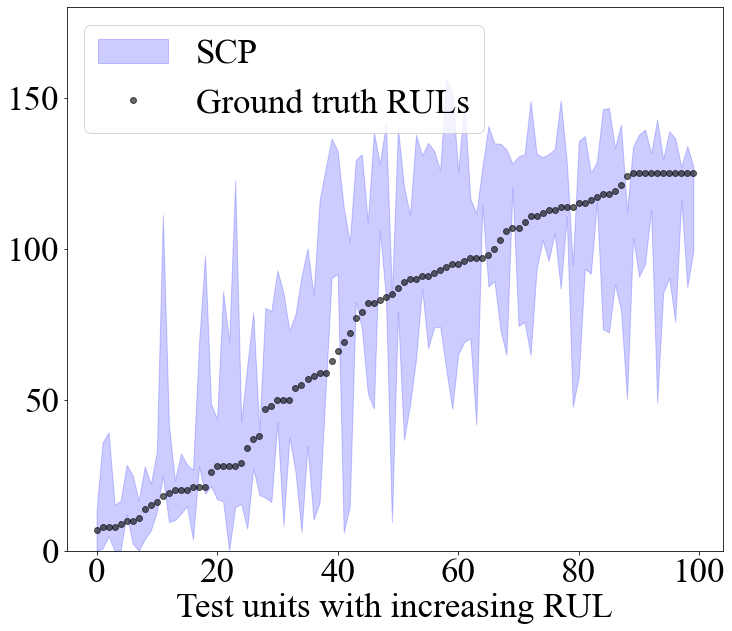

In [76]:
test_res = {"SCP": (np.maximum(0,y_hat_test.reshape(-1) - q*(np.array(mu_test)+beta)), y_hat_test.reshape(-1) + q*(np.array(mu_test)+beta))}
u.plot_sorted_targets_intervals(test_res, y_test)


In [36]:
y_hat_train = base_estimator.predict(X_train).reshape((-1,1))
y_hat_calval = base_estimator.predict(X_calval).reshape((-1,1))
res_train = np.abs(y_hat_train - y_train) 
res_calval = np.abs(y_hat_calval - y_calval) 

In [65]:
alpha = 0.1

y_hat_test = base_estimator.predict(X_test).reshape((-1,1))
scores = np.abs(y_calval - y_hat_calval) 

q = u.compute_quantile(scores, alpha)

print(u.compute_coverage_len(y_test, y_hat_test-q, y_hat_test+q))


(0.93, 0.9, 59.6079389312977)


In [66]:
q

29.803969465648848

In [69]:
1.83*np.array(mu_test).mean()

25.16153256436677

In [44]:
base_estimator2 = RandomForestRegressor(random_state=0) 
base_estimator2.fit(X_train, res_train)

C:\Users\Alireza\AppData\Local\Temp\ipykernel_22068\3670824941.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_estimator2.fit(X_train, res_train)


RandomForestRegressor(random_state=0)

In [50]:
alpha = 0.1

mu_calval = base_estimator2.predict(X_calval).reshape((-1,1))
mu_test = base_estimator2.predict(X_test).reshape((-1,1))
scores_normalized = scores/(mu_calval)

q = u.compute_quantile(scores, alpha)
q_new = u.compute_quantile(scores_normalized, alpha)

print(u.compute_coverage_len(y_test, y_hat_test-q, y_hat_test+q))
print(u.compute_coverage_len(y_test, y_hat_test-q_new*mu_test, y_hat_test+q_new*mu_test))


(0.93, 0.9, 59.6079389312977)
(0.92, 0.9, 57.81731497880777)


In [49]:
mu_calval

array([[1.9318],
       [2.9341],
       [0.9834],
       ...,
       [1.6677],
       [1.2107],
       [1.1149]])

In [16]:
GB = GradientBoostingRegressor(random_state=0)
GB.fit(X_train, y_train)

np.sqrt(mean_squared_error(y_test, GB.predict(X_test)))

c:\Users\Alireza\.conda\envs\rul_unc\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


17.82858744978805